In [43]:
#importamos librerias
import pandas as pd                                # Se trabaja todo lo que es la estructura de los datos
import statsmodels.formula.api as smf              # Permite ajustar modelos estadísticos utilizando fórmulas de estilo R
import numpy as np                                 # representa matrices multidimensionales, equivalentes a las matrices del R
from matplotlib import pyplot                      # Permite la generación de gráficos
from mpl_toolkits.mplot3d import Axes3D            # Permite agregar eje tridimensionales
from sklearn.linear_model import LinearRegression  # sklearn es una libreria que cuenta con algoritmos de clasificación, regresión, clustering y reducción de dimensionalidad
from sklearn import metrics                        # sklearn es una libreria que cuenta con algoritmos de clasificación, regresión, clustering y reducción de dimensionalidad
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files

uploaded = files.upload()   # Importamos los datos dentro del colab

Saving vgsales.csv to vgsales.csv


In [ ]:
df = pd.read_csv('vgsales.csv')    # Lo convertimos en un DataFrame

In [ ]:
#vista más clara de la dataframe
df.columns
df.head(30)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [ ]:
# Contamos los valores faltantes por columna
missing_data = df.isnull().sum()
print(missing_data)


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [ ]:

#eliminamos las filas con los valores N/A
df = df.dropna()

In [ ]:
 # Convertir columnas a tipos adecuados para la regresion
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Global_Sales'] = pd.to_numeric(df['Global_Sales'], errors='coerce')


In [ ]:
# Asegurarse de que no haya valores faltantes
df = df.dropna(subset=['Year', 'Global_Sales'])
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
Genero = df.value_counts ('Genre')

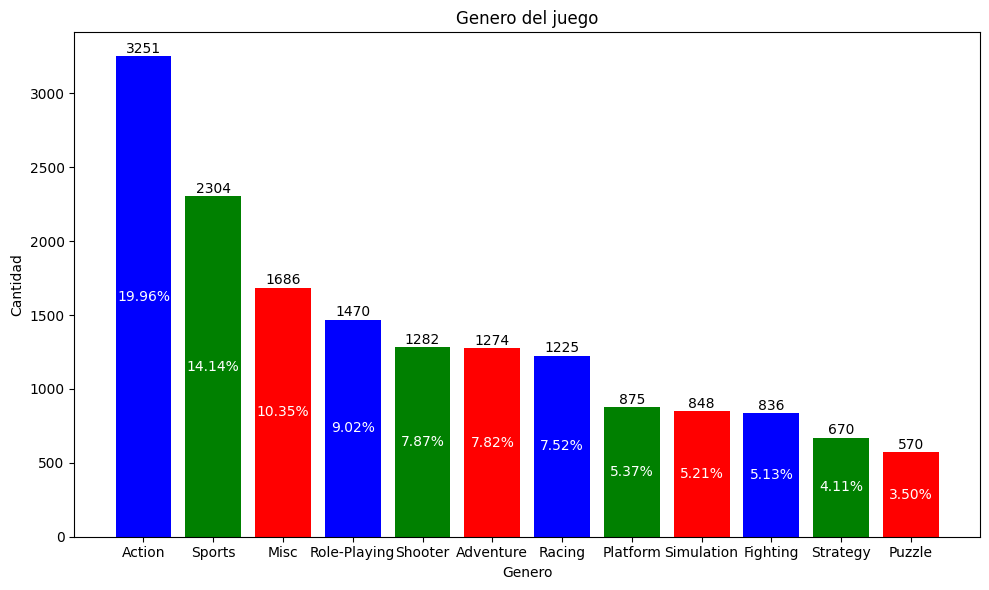

In [ ]:
# Calculando el porcentaje para cada nivel de educación
education_percentage = (Genero / Genero.sum()) * 100

# Creando el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(Genero.index, Genero.values, color=['blue', 'green', 'red'])

# Añadiendo el número de datos y el porcentaje en las barras
for idx, bar in enumerate(bars):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 2, yval, ha='center', va='bottom', fontsize=10)
    ax.text(bar.get_x() + bar.get_width()/2, yval/2, f'{education_percentage.iloc[idx]:.2f}%', ha='center', va='center', fontsize=10, color='white')

ax.set_title('Genero del juego')
ax.set_ylabel('Cantidad')
ax.set_xlabel('Genero')

plt.tight_layout()
plt.show()

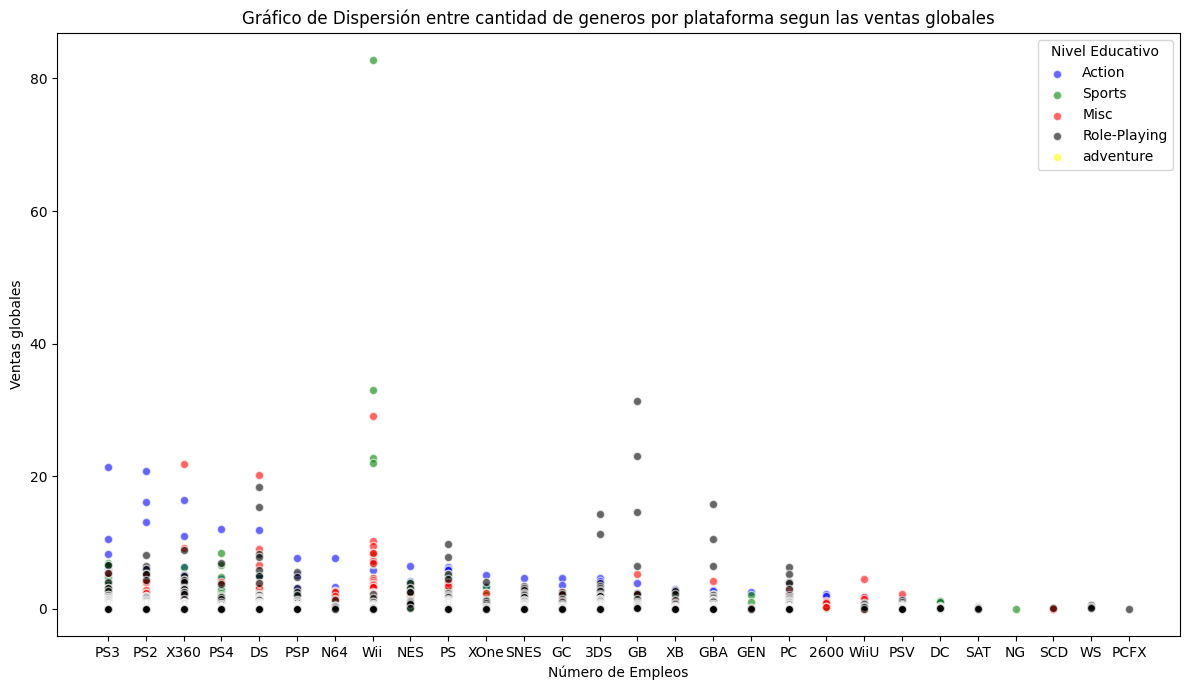

In [ ]:
# Creando el gráfico de dispersión entre salario y el número de empleos, diferenciando por nivel educativo
fig, ax = plt.subplots(figsize=(12, 7))

# Colores para cada nivel educativo
colors = {'Action': 'blue', 'Sports': 'green', 'Misc': 'red', 'Role-Playing': 'black', 'adventure': 'yellow'}

# Creando el gráfico de dispersión diferenciado por nivel educativo
for education, color in colors.items():
    subset = df[df['Genre'] == education]
    ax.scatter(subset['Platform'], subset['Global_Sales'], c=color, label=education, alpha=0.6, edgecolors='white')

ax.set_title('Gráfico de Dispersión entre cantidad de generos por plataforma segun las ventas globales')
ax.set_ylabel('Ventas globales')
ax.set_xlabel('Número de Empleos')
ax.legend(title='Nivel Educativo')

plt.tight_layout()
plt.show()

In [ ]:
#REGRESIÓN LINEAL SIMPLE
# Separar variables independientes (X) y dependientes (y)
X = df[['Year']]
y = df['Global_Sales']


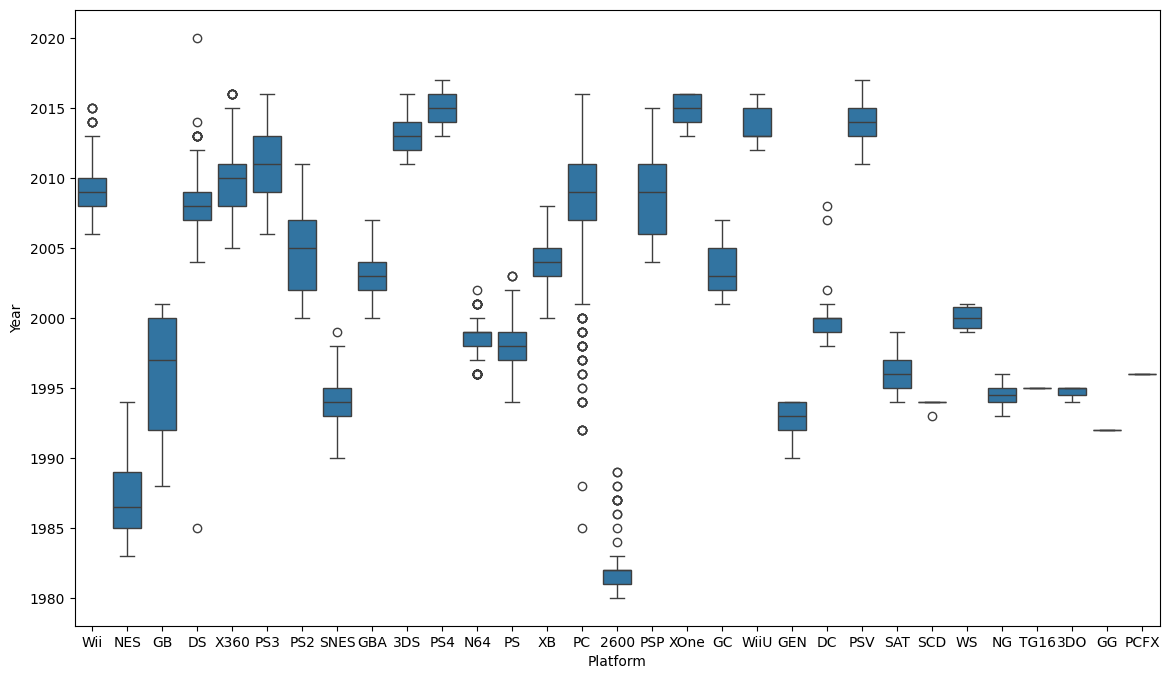

In [ ]:
# Crea una figura más grande
plt.figure(figsize=(14, 8))  # Ajusta el tamaño según tus preferencias

# Crea el gráfico de caja
fig = sns.boxplot(x=df['Platform'], y=df['Year'])

# Muestra la gráfica
plt.show()

In [ ]:
reg = smf.ols('Global_Sales ~ NA_Sales',data=df)   # Se establece la regrecion con el Ordinary Least Square dictando que el consumo
res = reg.fit()

In [49]:
y = df['Global_Sales']

In [50]:
lm = LinearRegression()
X = df[['NA_Sales']]

In [51]:
# Write your code below and press Shift+Enter to execute
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=0)
print("numero de datos de testeo :", x_test1.shape[0])
print("numero de datos de entrenamiento:",x_train1.shape[0])

numero de datos de testeo : 4888
numero de datos de entrenamiento: 11403


In [61]:
y_train1.info()

<class 'pandas.core.series.Series'>
Index: 11403 entries, 3459 to 2770
Series name: Global_Sales
Non-Null Count  Dtype  
--------------  -----  
11403 non-null  float64
dtypes: float64(1)
memory usage: 178.2 KB


In [63]:
lm.fit(x_train1,y_train1)
prediccion = lm.predict(X)
a = lm.intercept_
b = lm.coef_

In [64]:
print('Prediccion')
print('*'*100)
print(prediccion)     # Valores segun la prediccion
print('*'*100)
print(y)              # Valores actuales del consumo
print(lm.score(X,y))  # Retornamos el coeficiente de determinacion en la prediccion

Prediccion
****************************************************************************************************
[7.61935679e+01 5.34201430e+01 2.91419470e+01 ... 5.58241704e-02
 5.58241704e-02 7.41750366e-02]
****************************************************************************************************
0        82.74
1        40.24
2        35.82
3        33.00
4        31.37
         ...  
16593     0.01
16594     0.01
16595     0.01
16596     0.01
16597     0.01
Name: Global_Sales, Length: 16291, dtype: float64
0.8855164496038173


In [ ]:
resultados ={'Real':df['Global_Sales'],'Prediccion':prediccion}
result = pd.DataFrame(data=resultados)
print(result)

        Real  Prediccion
0      82.74   74.489876
1      40.24   52.228601
2      35.82   28.496396
3      33.00   28.317014
4      31.37   20.280712
...      ...         ...
16593   0.01    0.082327
16594   0.01    0.082327
16595   0.01    0.064389
16596   0.01    0.064389
16597   0.01    0.082327

[16291 rows x 2 columns]


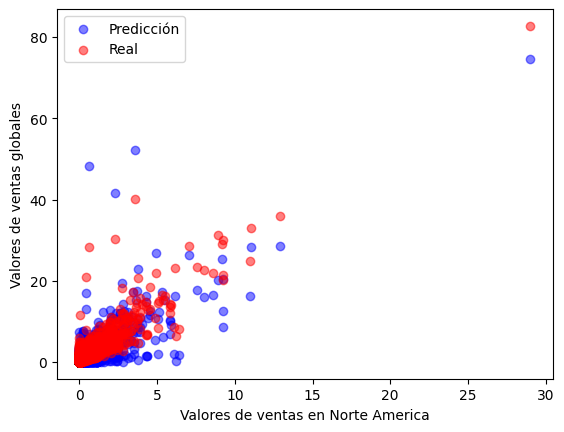

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Suponiendo que 'data' es tu DataFrame y 'prediccion' es la columna con las predicciones
resultados = {'Real': df['Global_Sales'], 'Prediccion': prediccion, 'Estatus': df['EU_Sales']}
result = pd.DataFrame(data=resultados)

# Crear la gráfica de puntos
plt.scatter(result['Estatus'], result['Prediccion'], c='blue', label='Predicción', alpha=0.5)
plt.scatter(result['Estatus'], result['Real'], c='red', label='Real', alpha=0.5)

# Etiquetas de ejes y leyenda
plt.xlabel('Valores de ventas en Norte America')
plt.ylabel('Valores de ventas globales')
plt.legend()

# Mostrar la gráfica
plt.show()


<ipython-input-42-66dda7a94bfc>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(result['Real'], color='red', label='Actual Value', shade=True)
<ipython-input-42-66dda7a94bfc>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(result['Prediccion'], color='blue', label='Fitted Values', shade=True, ax=ax)


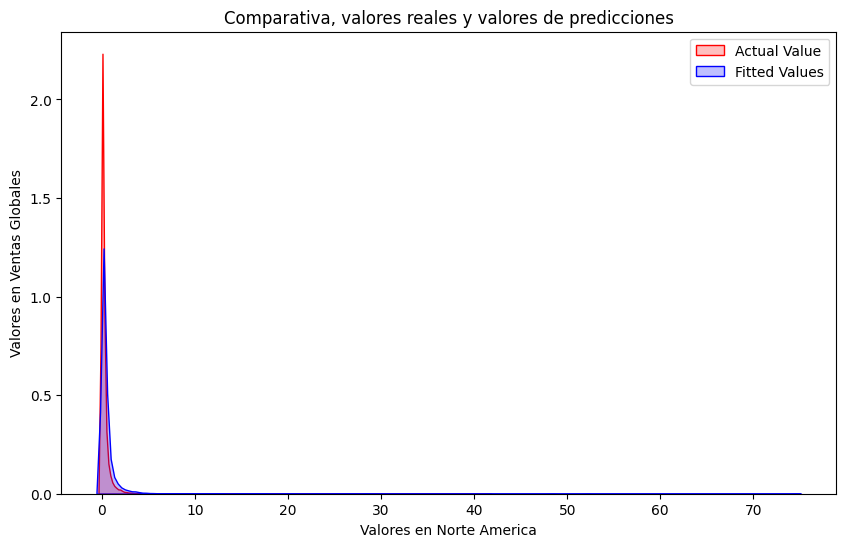

In [42]:
# Supongamos que 'df' es tu DataFrame y 'Y_hat' son las predicciones de tu modelo

# Crear un DataFrame con los valores reales ('Real') y las predicciones ('Prediccion')
resultados = {'Real': df['NA_Sales'], 'Prediccion': prediccion}
result = pd.DataFrame(data=resultados)

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Gráfico de distribución de los valores reales y predichos
ax = sns.kdeplot(result['Real'], color='red', label='Actual Value', shade=True)
sns.kdeplot(result['Prediccion'], color='blue', label='Fitted Values', shade=True, ax=ax)

# Configuración de etiquetas y título
plt.title('Comparativa, valores reales y valores de predicciones')
plt.xlabel('Valores en Norte America')
plt.ylabel('Valores en Ventas Globales')
plt.legend()

# Mostrar la gráfica
plt.show()
plt.close()


In [33]:
print(res.summary())    # Imprimimos los resultados
print(res.rsquared)
print(res.params)
mse = np.mean(res.resid**2)
print("Error cuadrático medio (MSE):", mse)
slope = res.params[1]      # Coeficiente de la pendiente (slope)
print("EL Coeficiente de la pendiente es ",slope)

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                 1.266e+05
Date:                Tue, 14 May 2024   Prob (F-statistic):               0.00
Time:                        20:45:02   Log-Likelihood:                -12749.
No. Observations:               16291   AIC:                         2.550e+04
Df Residuals:                   16289   BIC:                         2.552e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0644      0.004     14.777      0.0

In [35]:
# Obtener los coeficientes del modelo
intercept = res.params[0]  # Coeficiente del intercepto (constante)
slope = res.params[1]      # Coeficiente de la pendiente (slope)

# Imprimir la ecuación de la línea de regresión predicha
print(f"Ecuación de la línea de regresión predicha: y = {intercept:.2f} + {slope:.2f} * Ventas en norte america")

Ecuación de la línea de regresión predicha: y = 0.06 + 1.79 * Ventas en norte america


In [39]:
df_2= df[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales','Global_Sales']]
df_2.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,2006.0,41.49,29.02,3.77,82.74
1,1985.0,29.08,3.58,6.81,40.24
2,2008.0,15.85,12.88,3.79,35.82
3,2009.0,15.75,11.01,3.28,33.00
4,1996.0,11.27,8.89,10.22,31.37


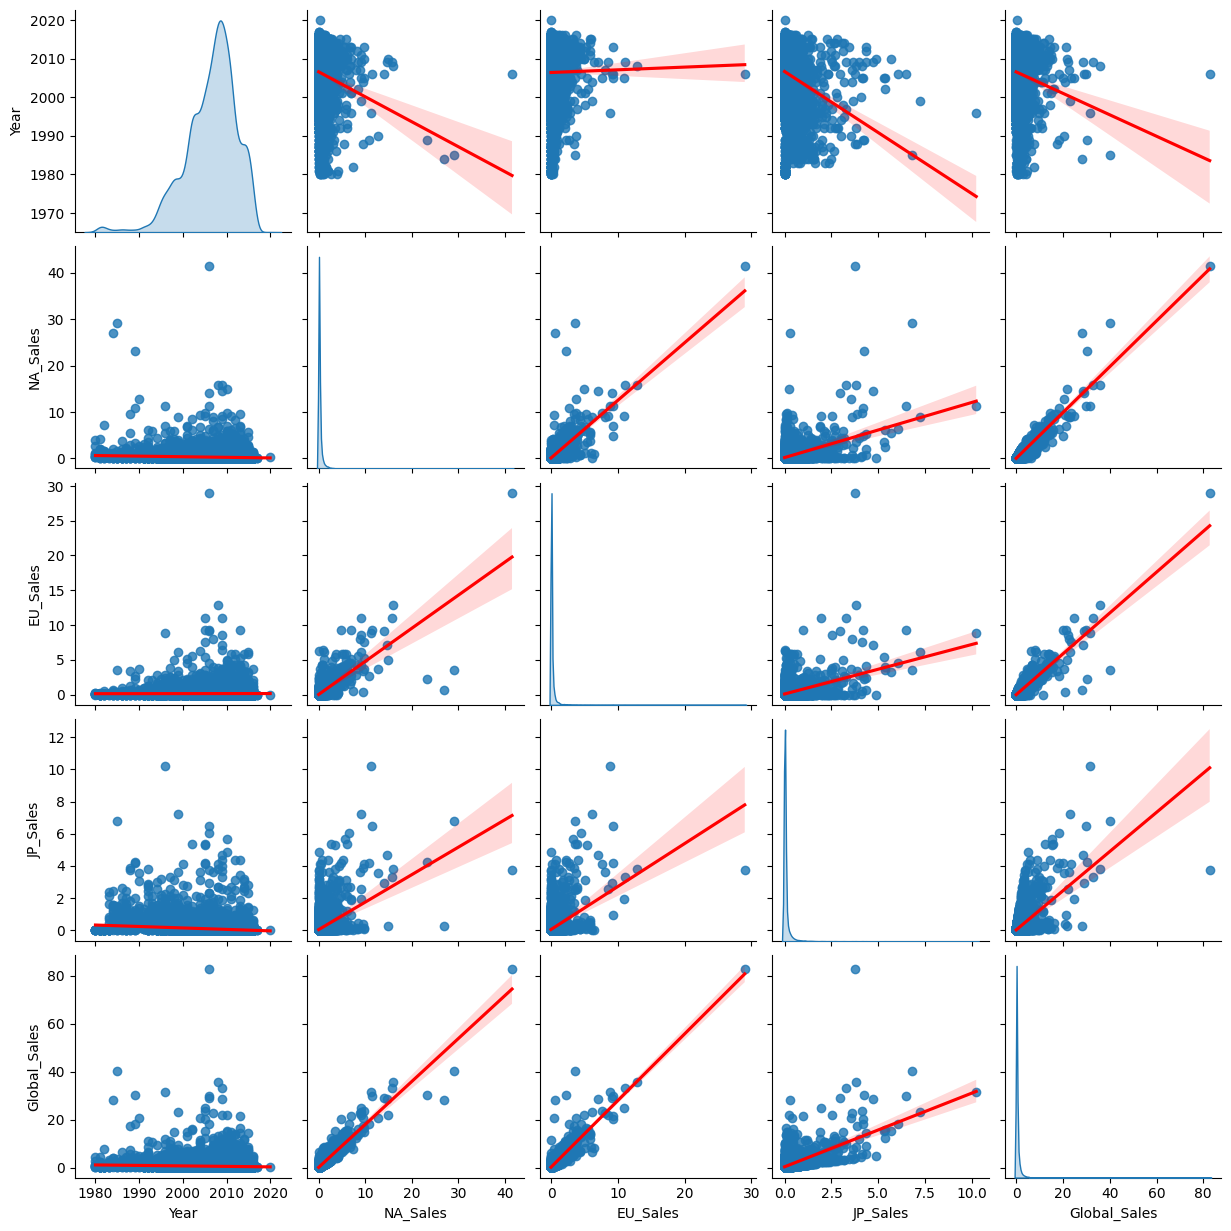

In [40]:
import seaborn as sns

# Supongamos que tienes un DataFrame llamado data2
sns.pairplot(df_2, kind='reg', diag_kind='kde', markers='o', plot_kws={'line_kws':{'color':'red'}})


In [ ]:
#sustituimos los valores
Yhat=40.818104254297204 + -0.02007463*X
Yhat

,Year
0,0.548396
1,0.969964
2,0.508247
3,0.488173
4,0.749143
...,...
16593,0.628695
16594,0.608620
16595,0.508247
16596,0.468098


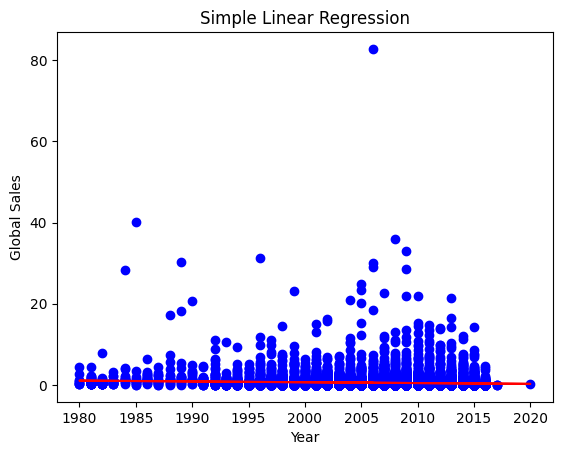

In [ ]:
# Visualizar los resultados
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.title('Simple Linear Regression')
plt.show()


In [ ]:
# Evaluar el modelo
RL.fit(X, y)
# encomtar R^2
print('El coeficiente de determinación (R-cuadrado) es: ', RL.score(X, y))

El coeficiente de determinación (R-cuadrado) es:  0.005572160939003701


In [ ]:
Yhat=RL.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

In [ ]:
#Muestra la relación lineal estimada entre los años de lanzamiento y las ventas globales.
mse = mean_squared_error(df['Year'], Yhat)
print('El error cuadrático medio entre las ventas globales y el valor predicho es: ', mse)

ValueError: Found input variables with inconsistent numbers of samples: [16598, 16291]

In [ ]:
#GRAFICOS DE REGRESION SIMPLE
#Cuando se trata de regresión lineal simple, una excelente manera de visualizar el ajuste de nuestro modelo es utilizando gráficos de regresión
#Este gráfico mostrará una combinación de puntos de datos dispersos (un <b>diagrama de dispersión, así como la línea de regresión lineal ajustada que atraviesa los datos.
#Esto nos dará una estimación razonable de la relación entre las dos variables, la fuerza de la correlación y la dirección (correlación positiva o negativa).

(0.0, 86.8765)

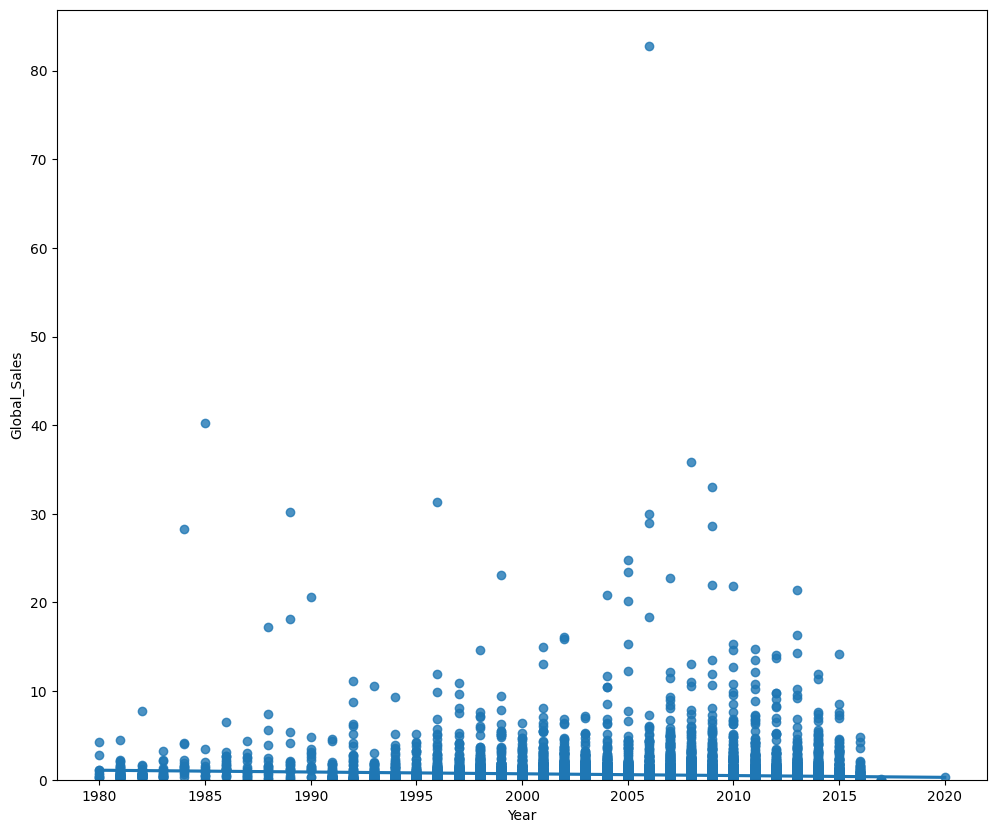

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="Year", y="Global_Sales", data=df)
plt.ylim(0,)

(0.0, 11.0985)

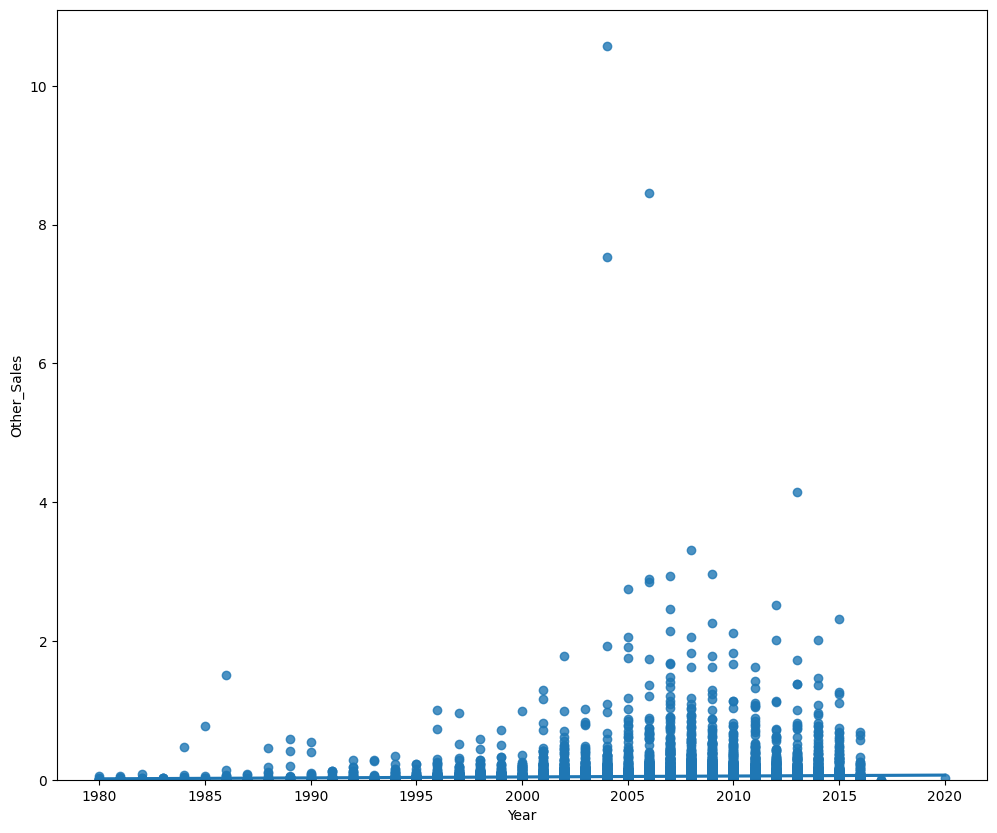

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="Year", y="Other_Sales", data=df)
plt.ylim(0,)

(0.0, 30.471)

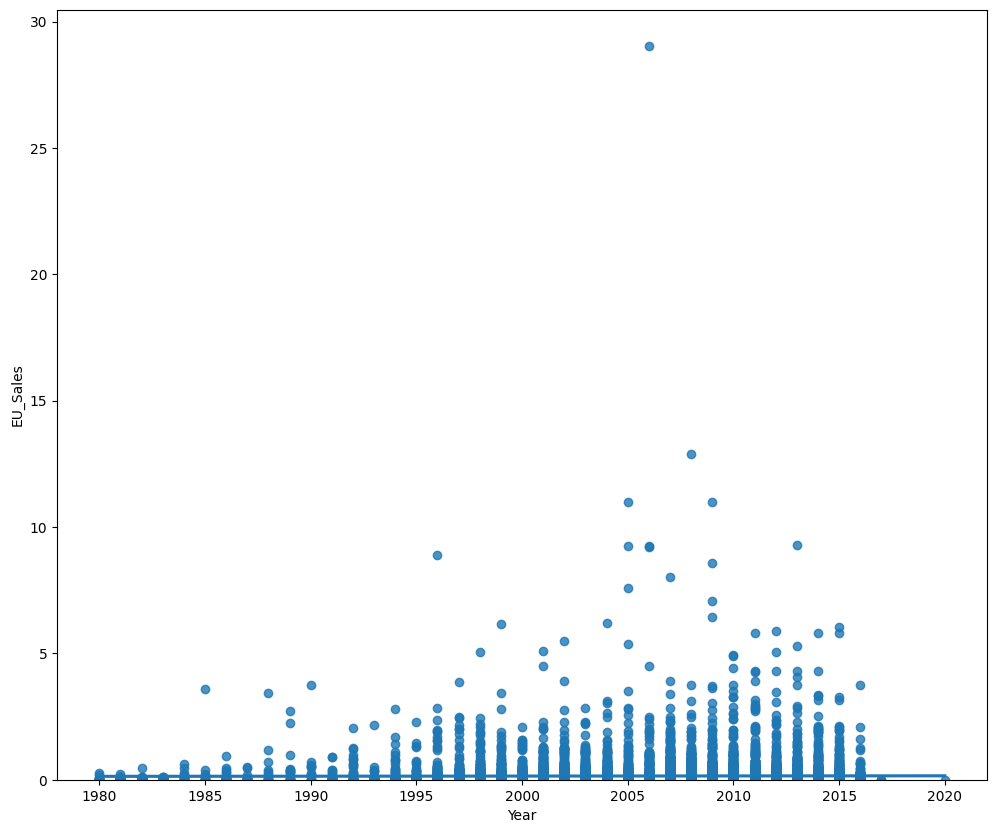

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="Year", y="EU_Sales", data=df)
plt.ylim(0,)

In [ ]:
#REGRESION LINEAL MULTIPLE
#crear el modelo regresion lineal multiple
Z = df[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
RL.fit(Z, df['Global_Sales'])

LinearRegression()

In [ ]:
#valor del intercepto
RL.intercept_

0.010843074804474107

In [ ]:
#valores de los coeficientes ('Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales')
RL.coef_

array([-5.24560997e-06,  9.99946342e-01,  9.99987903e-01,  9.99863762e-01,
        9.99621782e-01])

In [ ]:
#sustituyendo los valores reales obtenemos
Yhat2= -5.51071610e-06 *X+  9.99945627e-01*X+ 9.99988364e-01 *X+  9.99861720e-01 *X+ 9.99620567e-01 *X
Yhat2

,Year
0,8022.817999
1,7938.830373
2,8030.816821
3,8034.816231
4,7982.823891
...,...
16593,8006.820356
16594,8010.819767
16595,8030.816821
16596,8038.815642


In [ ]:
#Gráfico de Residuales
# manera de visualizar la varianza de los datos
#¿Qué es un <b>residual?
#La diferencia entre el valor observado (y) y el valor predicho (Yhat) se llama residual (e). Cuando observamos un gráfico de regresión, el residual es la distancia desde el punto de datos hasta la línea de regresión ajustada.
#Un gráfico de residuales es un gráfico que muestra los residuales en el eje vertical y la variable independiente en el eje horizontal.
#¿En qué nos fijamos cuando observamos un gráfico de residuales?
#Observamos la dispersión de los residuales:
#Si los puntos en un gráfico de residuales están <b>dispersos aleatoriamente alrededor del eje x</b>, entonces un <b>modelo lineal es apropiado para los datos.
#¿Por qué es eso? Los residuales dispersos aleatoriamente significan que la varianza es constante y, por lo tanto, el modelo lineal es adecuado para estos datos

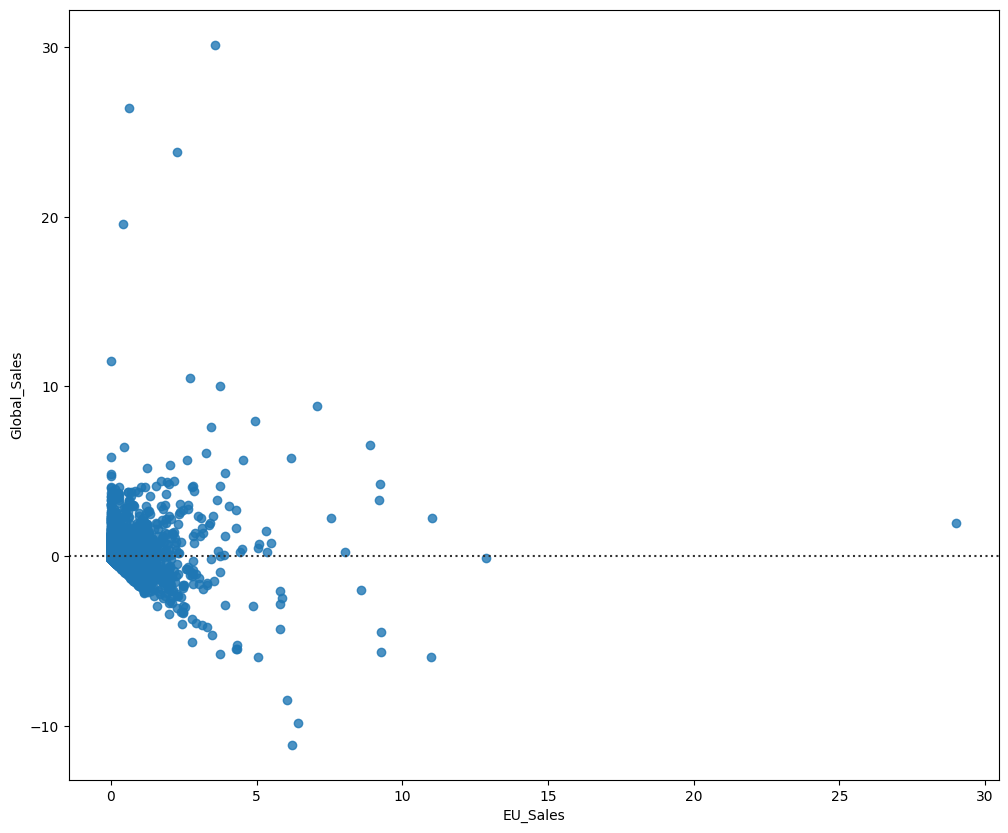

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['EU_Sales'], y=df['Global_Sales'])
plt.show()

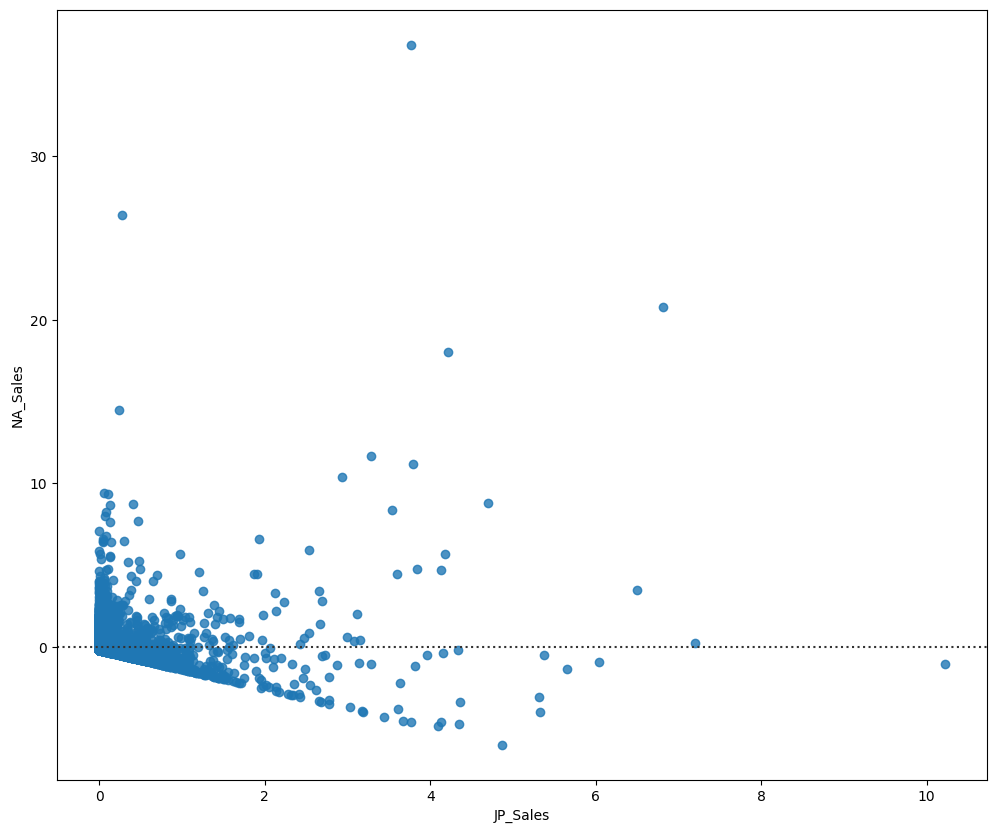

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['JP_Sales'], y=df['NA_Sales'])
plt.show()

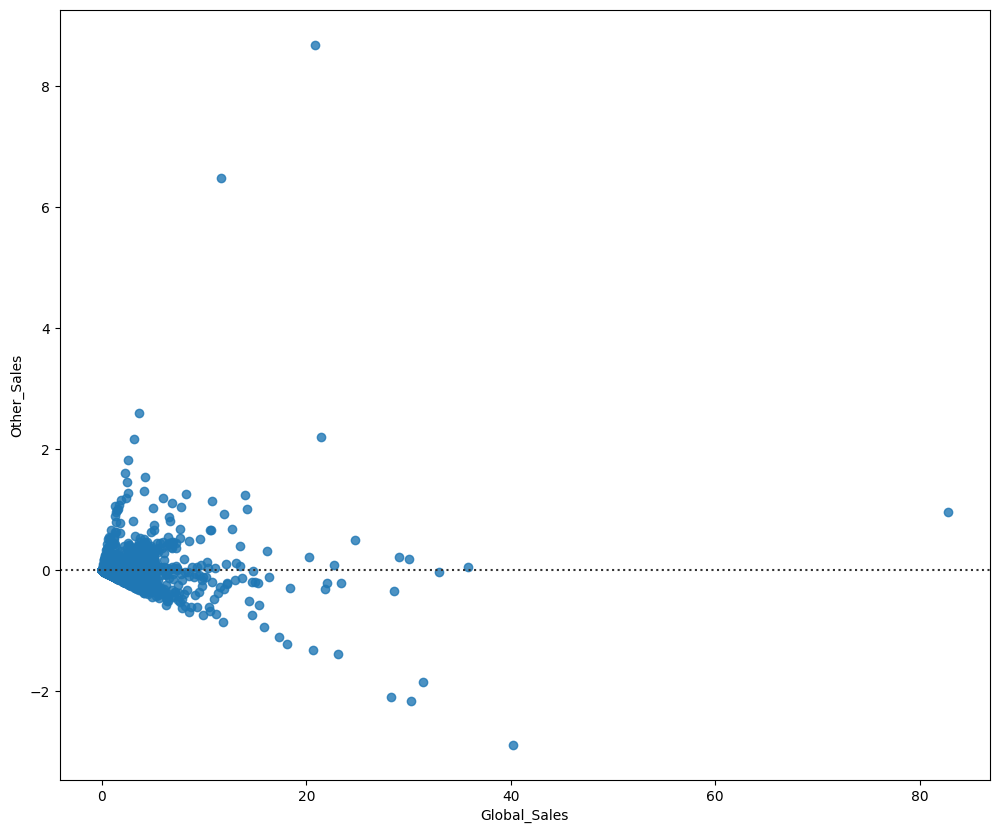

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['Global_Sales'], y=df['Other_Sales'])
plt.show()

In [ ]:
Y_hat = RL.predict(Z)
Y_hat

array([8.27340297e+01, 4.02376079e+01, 3.58275354e+01, ...,
       3.09889979e-04, 1.02992778e-02, 1.03355815e-02])

In [ ]:
# fit del modelo
RL.fit(Z, df['Other_Sales'])
# encontrar R^2
print('El coeficiente de determinación (R-cuadrado) es:', RL.score(Z, df['Other_Sales']))

ValueError: Found input variables with inconsistent numbers of samples: [16291, 16598]

In [ ]:
Y_predict_multifit = RL.predict(Z)
Y_predict_multifit

In [ ]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

C:\Users\Mario\AppData\Local\Temp\ipykernel_15888\1405208317.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['Global_Sales'], hist=False, color="r", label="Actual Value")
C:\Users\Mario\AppData\Local\Temp\ipykernel_15888\1405208317.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe57

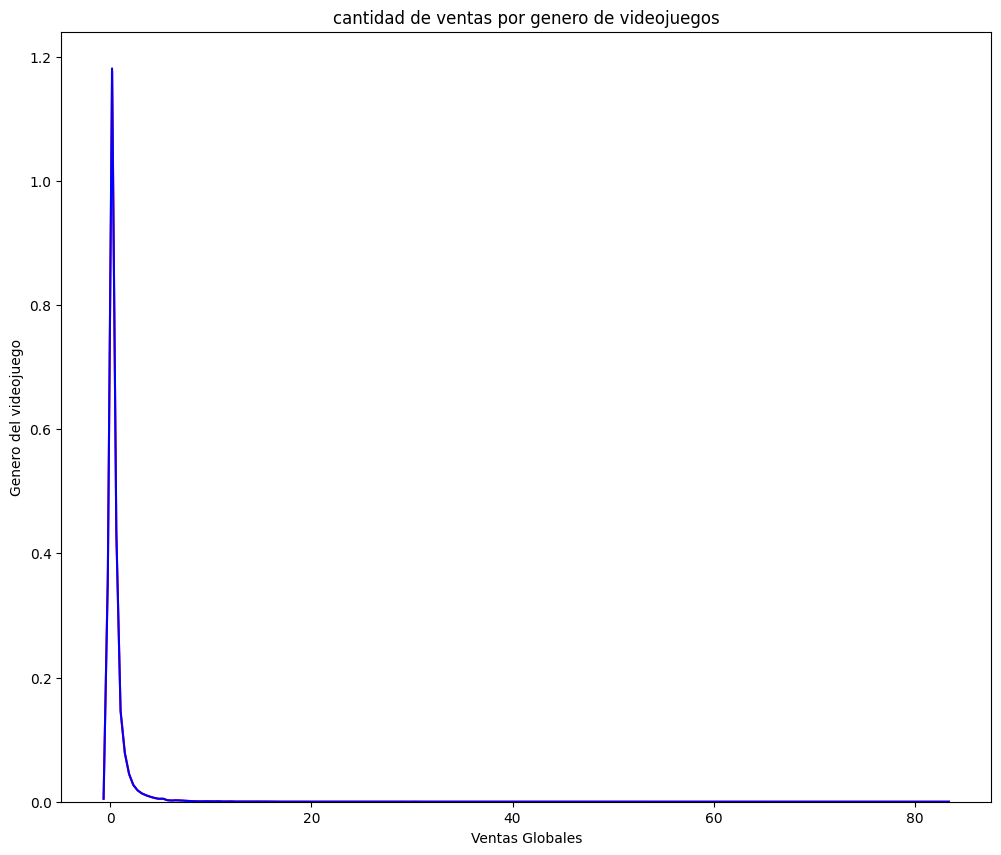

In [ ]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['Global_Sales'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('cantidad de ventas por genero de videojuegos')
plt.xlabel('Ventas Globales')
plt.ylabel('Genero del videojuego')

plt.show()
plt.close()

In [ ]:
#aqui no c con que hacer la relacion
#corteIII / MODELS
#Vimos anteriormente que un modelo lineal no proporcionaba el mejor ajuste al usar "highway-mpg" como la variable predictora. Veamos si podemos intentar ajustar un modelo polinómico a los datos en su lugar.
#Regresión Polinómica y Pipelines
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [ ]:
x = df['highway-mpg']
y = df['price']

In [ ]:
# Here we use a polynomial of the 3rd order (cubic)
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

In [ ]:
PlotPolly(p, x, y, 'highway-mpg')

In [ ]:
np.polyfit(x, y, 3)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2)
Z_pr=pr.fit_transform(Z)
Z.shape
Z_pr.shape
#pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
pipe
Z = Z.astype(float)
pipe.fit(Z,y)
ypipe=pipe.predict(Z)
ypipe[0:4]
from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)
mean_squared_error(df['price'], p(x))

In [ ]:
#Pronóstico y Toma de Decisiones
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
new_input=np.arange(1, 100, 1).reshape(-1, 1)
RL.fit(X, Y)
RL
yhat=RL.predict(new_input)
yhat[0:5]
plt.plot(new_input, yhat)
plt.show()